In [80]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 

from sklearn.datasets import make_blobs

In [81]:
np.random.seed(42)
# Generate imbalanced Dataset 
n_sample_1 = 25 # number of sample data points in class 1 
n_sample_2 = 375 # number of sample data points in class 2
n_centers = [(0,0), (2,2)] # Centers of each cluster
cluster_Std = [1.5, 1.5] # Standard deviation for each cluster 

In [82]:
X, y = make_blobs(
       n_samples=[n_sample_1, n_sample_2], 
       centers=n_centers, 
       cluster_std=cluster_Std, 
       random_state=0
 )

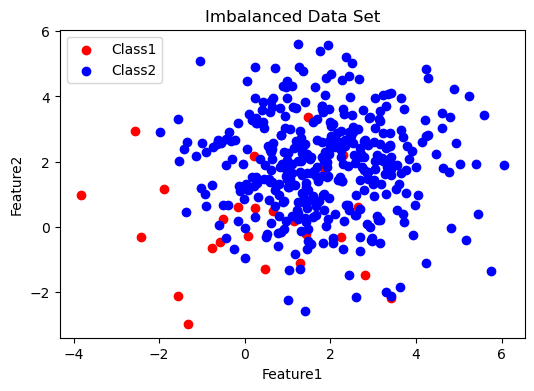

In [83]:
plt.figure(figsize=(6,4))
plt.scatter(X[y == 0][:,0], X[y == 0][:, 1], color='red', label='Class1')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue', label='Class2')

plt.title('Imbalanced Data Set')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

plt.legend()
plt.show()

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model1 = LogisticRegression()
model1.fit(X_train, y_train)

model1_predict = model1.predict(X_test)

print('Classification Report of Model trained over Unbalanced data is:')
print(classification_report(y_test, model1_predict))

Classification Report of Model trained over Unbalanced data is:
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.96      0.99      0.97        76

    accuracy                           0.95        80
   macro avg       0.73      0.62      0.65        80
weighted avg       0.94      0.95      0.94        80



# Techniques to Handle Imbalanced Data : 

# Random UnderSampling 

In [86]:
from imblearn.under_sampling import RandomUnderSampler

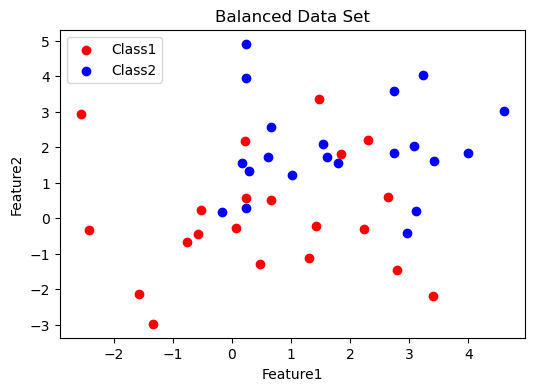

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Applying Random Under Sampling 
random_U_S = RandomUnderSampler(random_state=42) 
X_UnderSampled, y_UnderSampled = random_U_S.fit_resample(X_train,y_train) 

plt.figure(figsize=(6,4))
plt.scatter(X_UnderSampled[y_UnderSampled == 0][:,0], X_UnderSampled[y_UnderSampled == 0][:, 1], color='red', label='Class1')
plt.scatter(X_UnderSampled[y_UnderSampled == 1][:,0], X_UnderSampled[y_UnderSampled == 1][:, 1], color='blue', label='Class2')

plt.title('Balanced Data Set')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

plt.legend()
plt.show()

In [88]:
X_train.shape

(320, 2)

In [89]:
X_UnderSampled.shape

(42, 2)

In [90]:
pd.Series(y_train).value_counts()

1    299
0     21
Name: count, dtype: int64

In [91]:
pd.Series(y_UnderSampled).value_counts()

0    21
1    21
Name: count, dtype: int64

In [92]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()
model2.fit(X_UnderSampled, y_UnderSampled)

model2_predict = model2.predict(X_test)

print('Classification Report of Model trained over Random UnderSampled data is:')
print(classification_report(y_test, model2_predict))

Classification Report of Model trained over Random UnderSampled data is:
              precision    recall  f1-score   support

           0       0.18      1.00      0.31         4
           1       1.00      0.76      0.87        76

    accuracy                           0.78        80
   macro avg       0.59      0.88      0.59        80
weighted avg       0.96      0.78      0.84        80



# Random OverSampling 

In [93]:
from imblearn.over_sampling import RandomOverSampler

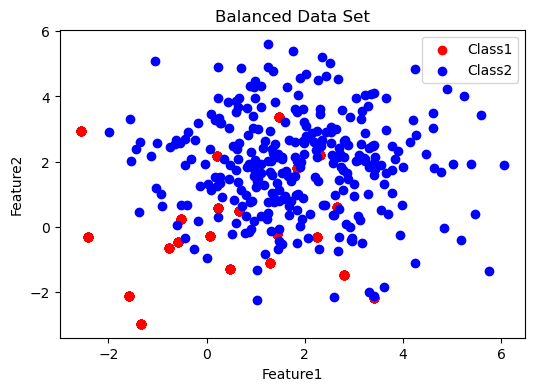

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Applying RandomOverSampling 
randomOverSample = RandomOverSampler(random_state=42) 
X_OverSampled, y_OverSampled = randomOverSample.fit_resample(X_train, y_train) 

plt.figure(figsize=(6,4))
plt.scatter(X_OverSampled[y_OverSampled == 0][:,0], X_OverSampled[y_OverSampled == 0][:, 1], color='red', label='Class1')
plt.scatter(X_OverSampled[y_OverSampled == 1][:,0], X_OverSampled[y_OverSampled == 1][:, 1], color='blue', label='Class2')

plt.title('Balanced Data Set')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

plt.legend()
plt.show()


In [95]:
X_train.shape

(320, 2)

In [96]:
X_OverSampled.shape

(598, 2)

In [97]:
from sklearn.linear_model import LogisticRegression

model3 = LogisticRegression()
model3.fit(X_OverSampled, y_OverSampled)

model3_predict = model3.predict(X_test)

print('Classification Report of Model trained over Random OverSampled data is:')
print(classification_report(y_test, model3_predict))

Classification Report of Model trained over Random OverSampled data is:
              precision    recall  f1-score   support

           0       0.18      1.00      0.31         4
           1       1.00      0.76      0.87        76

    accuracy                           0.78        80
   macro avg       0.59      0.88      0.59        80
weighted avg       0.96      0.78      0.84        80



# SMOTE 
Synthetic Minority Oversampling Technique, a method used in machine learning to address class imbalance in a dataset by creating new synthetic data points for the minority class. Instead of simply duplicating existing minority samples, SMOTE generates new examples by interpolating between existing ones, creating synthetic data that helps prevent a model from being biased towards the majority class and improves its performance.

In [111]:
from imblearn.over_sampling import SMOTE

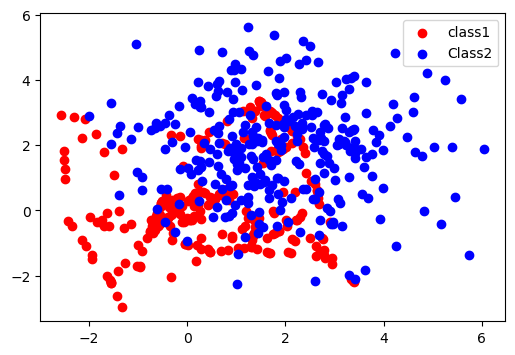

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

smote = SMOTE(random_state=42)
X_Smote, y_Smote = smote.fit_resample(X_train, y_train)

plt.figure(figsize=(6,4))
plt.scatter(X_Smote[y_Smote==0][:,0] , X_Smote[y_Smote==0][:,1], color='red', label='class1')
plt.scatter(X_Smote[y_Smote==1][:,0], X_Smote[y_Smote==1][:,1], color='blue', label='Class2')

plt.legend()
plt.show()


In [120]:
X_train.shape

(320, 2)

In [121]:
X_Smote.shape

(598, 2)

In [126]:
model4 = LogisticRegression()
model4.fit(X_Smote, y_Smote)

model4_predict = model4.predict(X_test)
print(classification_report(y_test, model4_predict))

              precision    recall  f1-score   support

           0       0.17      1.00      0.30         4
           1       1.00      0.75      0.86        76

    accuracy                           0.76        80
   macro avg       0.59      0.88      0.58        80
weighted avg       0.96      0.76      0.83        80

